https://towardsdatascience.com/pdf-preprocessing-with-python-19829752af9f
```
pip install pdfminer.six
pip install PyPDF2
```

# BrizhinskiyVasiliySergeevich_001

https://pdfminersix.readthedocs.io/en/latest/tutorial/extract_pages.html

In [5]:
from io import StringIO
from pdfminer.high_level import extract_text_to_fp
from pdfminer.layout import LAParams

In [7]:
import pdfminer.high_level

In [10]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar

page_id = 0

items = []

for page_layout in extract_pages("books_parallel/BrizhinskiyVasiliySergeevich_001.pdf"):
    page_id += 1
    if page_id < 2:
        continue
    if page_id  > 2:
        break
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                if not hasattr(text_line, 'bbox'):
                    print(text_line, 'no bbox')
                    continue
                text = text_line.get_text()
                items.append([text, text_line.bbox])

In [11]:
items

[['БРЫЖИНСКИЙ\n',
  (314.765, 612.0110000000001, 432.48019999999997, 628.0110000000001)],
 ['Василий\n', (314.765, 595.691, 371.7666, 611.691)],
 ['Сергеевич\n', (314.765, 579.1902, 381.48179999999996, 595.1902)],
 ['Чачсь  1934  иень  январень  19%це  чистэ\n',
  (124.565, 530.2850000000001, 304.62300000000005, 540.2850000000001)],
 ['МР%нь Кочкуровань райононь Од Тягловка\n',
  (111.845, 519.3050000000001, 304.56899999999996, 529.3050000000001)],
 ['велесэ,  театровед,  режиссёр,  педагог.  Ис%\n',
  (111.845, 508.325, 304.63200000000023, 518.325)],
 ['кусствоведениянь кандидат (1983), доцент\n',
  (111.845, 497.28499999999997, 304.56500000000005, 507.28499999999997)],
 ['(1988).  РФ%нь  ды  МАССР%нь  культурань\n',
  (111.84500000000003, 486.30499999999995, 304.557, 496.30499999999995)],
 ['заслуженной роботник (1999, 1977). МР%нь\n',
  (111.84500000000003, 475.32499999999993, 304.547, 485.32499999999993)],
 ['Государственной  премиянь  лауреат  (2005).\n',
  (111.84500000000003,
  

In [12]:
text_line

<LTTextLineHorizontal 309.065,122.935,314.205,132.935 '2\n'>

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [14]:
pl = page_layout.bbox
pl

(0, 0, 595, 842)

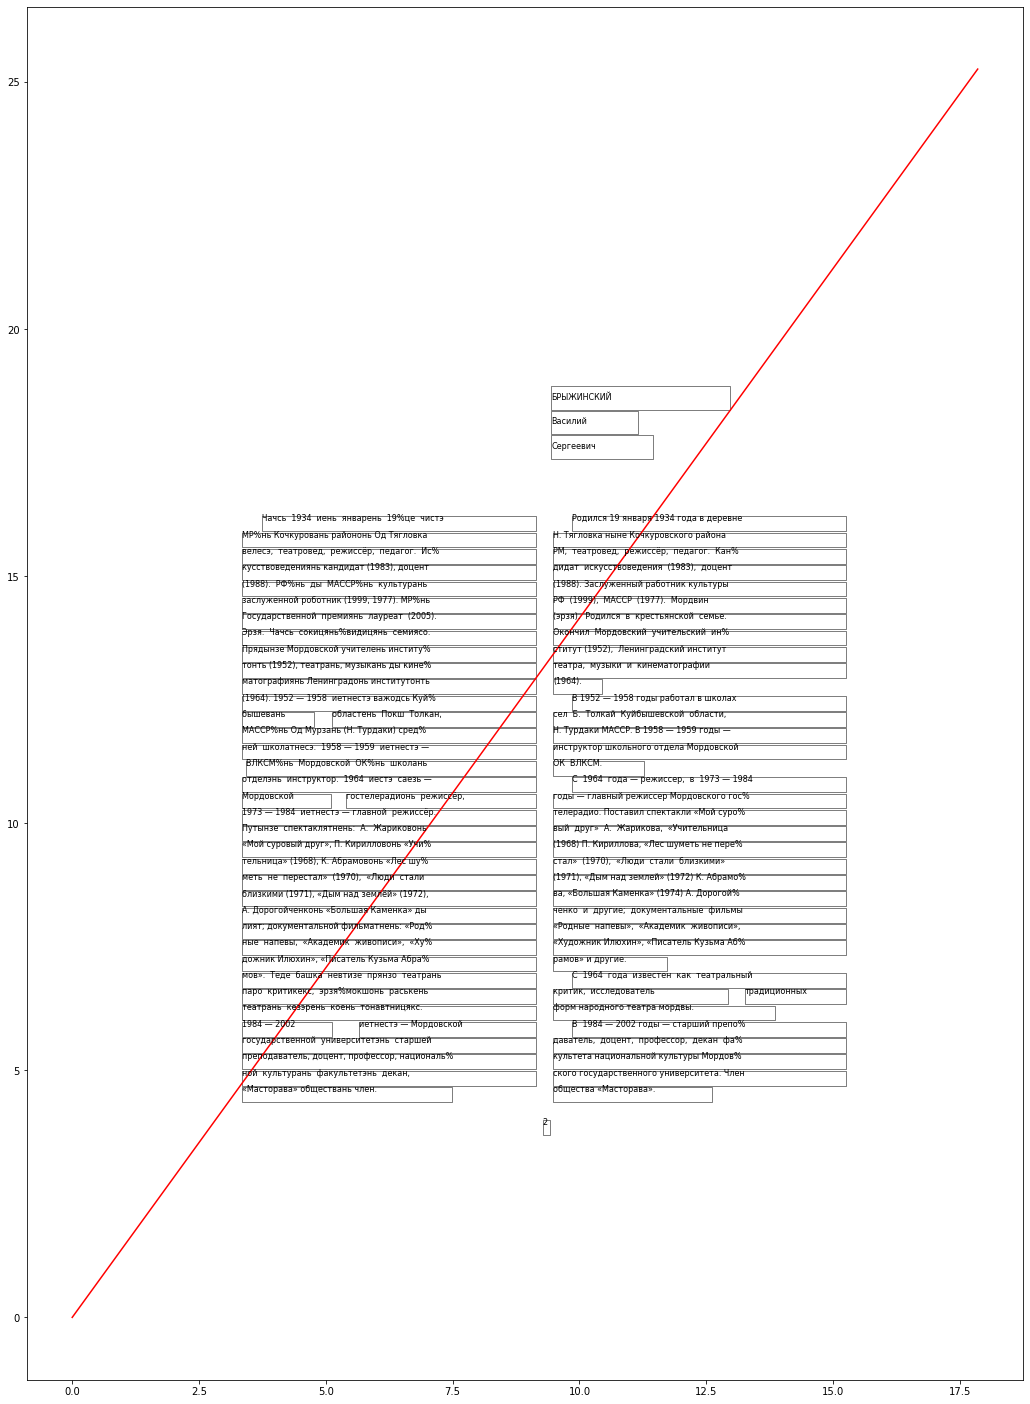

In [15]:
mult = 0.03
fig, ax = plt.subplots(figsize=(pl[2]*mult, pl[3]*mult))

#create simple line plot
ax.plot([0, pl[2]*mult], [0, pl[3]*mult], c='red')

#add rectangle to plot
for item in items[:100]:
    word, rect = item
    r2 = [x * mult for x in rect]
    ax.add_patch(patches.Rectangle((r2[0], r2[1]), r2[2]-r2[0], r2[3]-r2[1], fill=False, lw=0.5, color='black'))
    ax.text(r2[0], r2[1], word, fontsize=8)

#display plot
plt.show()


In [16]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar

page_id = 0


for page_layout in extract_pages("russian-moksha-erzya-dictionary.pdf"):
    page_id += 1
    if page_id < 9:
        continue
    if page_id  > 9:
        break
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                if "бабушка" in text_line.get_text():
                    print(text_line)
                    res = text_line
                    break


<LTTextLineHorizontal 129.274,498.945,246.237,508.544 'женщина); 2. щава (бабушка\n'>
<LTTextLineHorizontal 256.334,498.946,364.171,508.545 'ба, вечкабаба (бабушка по\n'>


### Extraction

In [38]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar
from tqdm.auto import tqdm, trange

page_id = 0

pages = []

for page_layout in tqdm(extract_pages("books_parallel/BrizhinskiyVasiliySergeevich_001.pdf")):
    page_id += 1
    items = []
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                if not hasattr(text_line, 'bbox'):
                    print(text_line, 'no bbox')
                    continue
                text = text_line.get_text()
                items.append([text, text_line.bbox])
    pages.append(items)

0it [00:00, ?it/s]

<LTAnno '\n'> no bbox


In [99]:
items = pages[2]

In [100]:
lhs = []
rhs = []

for text, box in items:
    if box[1] < 130:  # too low on the page
        continue
    if 80 < box[0] < 170 and box[0] < 330:
        lhs.append(text)
    elif 280 < box[0] < 350:
        rhs.append(text)

In [459]:
lhs_raw = []
rhs_raw = []

for page_id, page in enumerate(tqdm(pages[1:2] + pages[11:264])):
    items = page
    lhs = []
    rhs = []

    for text, box in items:
        if box[1] < 130:  # too low on the page
            continue
        if 80 < box[0] < 140 and box[0] < 340:
            lhs.append(text)
        elif 280 < box[0] < 340:
            rhs.append(text)
    
    if not lhs or not rhs:
        continue
    
    lhs_raw.extend([(text, page_id) for text in lhs])
    rhs_raw.extend([(text, page_id) for text in rhs])
    
    

  0%|          | 0/254 [00:00<?, ?it/s]

In [139]:
from razdel import sentenize

In [474]:
import re

def create_chunks(lines):
    chunks = []
    last_par = []
    for line, page_id in lines:
        line = line.replace('%', '-').replace(';', '-').replace('&', '-').rstrip('\n')
        line = re.sub('\(cid:\d+\)', ' ', line)
        if last_par and last_par[-1].endswith('-'):
            last_par[-1] = last_par[-1][:-1]
            last_par.append(line)
        else:
            last_par.append(' ')
            last_par.append(line)
        if line.endswith('.') or line.isupper():
            chunks.append([last_par, page_id])
            last_par = []
    chunks.append([last_par, page_id])
    res = []
    for t, page_id in chunks:
        t = ''.join(t).strip().replace('  ', ' ').replace('  ', ' ')
        if t:
            res.append((t, page_id))
    return res 

In [475]:
lhs_chunks = create_chunks(lhs_raw)
rhs_chunks = create_chunks(rhs_raw)

In [477]:
lhs_sents = [(s.text, p) for c, p in lhs_chunks for s in sentenize(c)]
rhs_sents = [(s.text, p) for c, p in rhs_chunks for s in sentenize(c)]

In [480]:
len(lhs_sents), len(rhs_sents)

(5194, 4851)

In [481]:
import random
text = random.choice(lhs_sents)
text

('Эйстэст улема кеменде а седе ламо.', 73)

In [487]:
for i in range(len(pages)):
    n_lhs = len([t for t, p in lhs_sents if p == i])
    n_rhs = len([t for t, p in rhs_sents if p == i])
    if abs(n_lhs - n_rhs) > 20:
        print(i, n_lhs, n_rhs)

In [516]:
import json

In [521]:
with open('other_sources/BrizhinskiyVasiliySergeevich_001___sentences_unaligned.json', 'w') as f:
    json.dump({'myv': lhs_sents, 'rus': rhs_sents}, f, ensure_ascii=False, indent=' ')

# sheyanova-skazovyie-formyi-mordovskorj-literaturyi

In [615]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar
from tqdm.auto import tqdm, trange

page_id = 0

pages = []

for page_layout in tqdm(extract_pages("books_parallel/sheyanova-skazovyie-formyi-mordovskorj-literaturyi.pdf")):
    page_id += 1
    #if page_id != 108:
    #    continue
    
    items = []
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                if not hasattr(text_line, 'bbox'):
                    print(text_line, 'no bbox')
                    continue
                text = text_line.get_text()
                fonts = {c.fontname for c in text_line if isinstance(c, LTChar)}
                items.append([text, text_line.bbox, fonts])
    pages.append(items)

0it [00:00, ?it/s]

Parallel part: pages 107 to 237 (inclusive)

In [616]:
pages[107]

[['ПРИЛОЖЕНИЕ\n',
  (281.52, 540.1190399999999, 351.37098700799993, 550.67904),
  {'FNTSBS+TimesNewRomanPSMT'}],
 ['Литературное наследие поэта-импровизатора И. Зо-\n',
  (87.6, 517.55904, 336.99843033600007, 528.11904),
  {'FNTSBS+TimesNewRomanPS-ItalicMT'}],
 ['рина, уроженца села Степная Шентала Самарского уез-\n',
  (73.44, 506.27904, 337.106178048, 516.83904),
  {'FNTSBS+TimesNewRomanPS-ItalicMT'}],
 ['да Самарской губернии, сохранилось благодаря научной\n',
  (73.44, 494.99904, 337.157332992, 505.55904),
  {'FNTSBS+TimesNewRomanPS-ItalicMT'}],
 ['деятельности  финского  ученого  Х.  Паасонена.  Будучи\n',
  (73.44, 483.71904, 337.15939660800007, 494.27904),
  {'FNTSBS+TimesNewRomanPS-ItalicMT'}],
 ['его корреспондентом, Зорин представил для публикации\n',
  (73.44, 472.43904000000003, 337.07704339200006, 482.99904000000004),
  {'FNTSBS+TimesNewRomanPS-ItalicMT'}],
 ['около семидесяти стихотворных произведений, которые\n',
  (73.44, 461.15904, 336.99886790400006, 471.71904),
  {'F

In [674]:
NEW_SENT = '<new_sentence>'

In [675]:
sections = []
section = []
prev_box, prev_page = None, None
is_head, prev_head = False, False

for i in range(107, 238):
    for line, bbox, fonts in pages[i]:
        # remove page numbers
        if bbox[1] < 50: 
            continue
        # remove cursive after sections
        if any({'italic' in f.lower() for f in fonts}):
            continue
        # detect headings and insert new_sections
        tt = line.split('(')[0].strip()
        if len(tt) >= 1 and tt.isupper() and not re.match('С\. \d+ — \d+\.', tt) \
            and not tt.startswith('['):
            is_head = True
            if not (prev_page==i and  bbox[1] > prev_box[1] - 20):
                prev_box, prev_page = bbox, i
                if section and section[0] != 'ПРИЛОЖЕНИЕ': # skip the first one
                    sections.append(section)
                section = []
        else:
            is_head = False
        # add periods after headings
        if prev_head and not is_head:
            section.append(NEW_SENT)  # todo: make sure that Razdel understands that it is the end of sentence
        prev_head = is_head
        section.append(line.strip())
sections.append(section)

In [677]:
sections[25]

['КАК ЭРЗЯНСКАЯ ЗЕМЛЯ ПЕРЕШЛА',
 'РУССКОМУ ЦАРЮ',
 '<new_sentence>',
 '«Давно-давно  у  нас,  у  эрзяков,  была  своя  собственная  зем-',
 'ля», — говорит мне однажды мой дедушка. Я говорю: «Как? Где',
 'же  наша  земля?»  —  «Есть  большая  река  Волга,  в  реку  впадает',
 'другая рекa Кама. При устье Камы жили болгары и татары. А на',
 'той стороне Волги, напротив земель болгар и татар, была земля',
 'эрзяков. У  нас был  свой собственный  князь, но  он со  своей го-',
 'ловой, похожей на пустой чугун, не мог удержать этой земли. У',
 'нас были хорошие земли; лесов, лугов у нас было сколько угод-',
 'но; оттого pyccкиe позавидовали на нашу землю. Рядом с нашей',
 'землей была русская земля. Русский князь был умнее нашего кня-',
 'зя.  Русский  князь  пришел  к  нашему  князю  и  говорит:  „Продай',
 'свою землю!“. „Отчего же, или не продам“, — отвечает наш князь.',
 'И они поладили на следующем: pyccкий князь выберет в своем',
 'народе человека, вокруг шеи этого человека (должно) н

In [678]:
new_sections = []
for section in sections:
    texts = []
    for line in section:
        if line.endswith('-'):
            line = line[:-1]
        else:
            line = line + ' '
        texts.append(line)
    new_section = []
    for s in sentenize(''.join(texts).replace('  ', ' ')):
        new_section.extend(s.text.split(NEW_SENT))
    new_sections.append(new_section)

In [679]:
for i, sec in enumerate(new_sections):
    print(i, len(sec), sec[0])

0 52 КЕЗЭРЕНЬ КОЕСЬ (э.)
1 51 ДРЕВНИЙ ОБЫЧАЙ 
2 44 МАСТОРПАЗ (э.)
3 43 МАСТОРПАЗ (БОГ ЗЕМЛИ) 
4 32 СЮПАВОНЬ МОРО (э.)
5 31 ПЕСНЯ БОГАТОГО 
6 32 ЛАМО НУЖА НЕИНЕК (э.)
7 31 МНОГО НУЖДЫ ВИДЕЛИ 
8 57 МОРО ЧИМБУЛАТ АТЯДО (э.)
9 56 ПЕСНЯ О СТАРИКЕ ЧИМБУЛАТЕ 
10 96 КОДА РОДЯ ПОЛАНЗО МИКШНИЗЕ ДЫ ОДОВ РАМИЗЕ (э.)
11 95 КАК РОДИОН ЖЕНУ ПРОДАВАЛ И ОБРАТНО ПОКУПАЛ 
12 37 МОРО ОДПОРАДО ДЫ СЫРЕЧИДЕ (э.)
13 35 ПЕСНЯ О МОЛОДОСТИ И СТАРОСТИ 
14 622 ЭРЗЯ-МОКШОНЬ ИСТОРИЯ (э.)
15 107 МОРДОВСКАЯ ИСТОРИЯ 
16 24 МОКШЭРЗЯНЬ МАСТОР (м.)
17 20 МОРДОВСКАЯ ЗЕМЛЯ 
18 14 ЭРЗЯ ИНЯЗОР ТЮШТЯНЬ КВАЛМА (м.)
19 13 ОБ ЭРЗЯНСКОМ ЦАРЕ ТЮШТЕ 
20 99 ОРКИНА: ВАСЕНЦЕ ЭРИЦЯТНЕ (э.)
21 95 НАЧАЛО ОРКИНА: ПЕРВЫЕ ПОСЕЛЕНЦЫ 
22 96 АРЧИЛОВ ВЕЛЕСЬ (э.)
23 84 НАЧАЛО СУХОГО КАРБУЛАКА 
24 24 КОДА ЭРЗЯНЬ МАСТОРОСЬ ЮТАСЬ РУЗ ИНЯЗОРОНТЕНЬ (э.)
25 22 КАК ЭРЗЯНСКАЯ ЗЕМЛЯ ПЕРЕШЛА РУССКОМУ ЦАРЮ 
26 122 СУХОЙ КАРБУЛАК 
27 118 СУХОЙ КАРБУЛАК 
28 160 ОРКИНО 
29 140 ОРКИНО 
30 2 ЭРЬМЕЗЬ 
31 8 I 
32 7 II 
33 14 III 
34 6 IV 
35 40 V 
36 28 VI 
37 7 V

In [681]:
new_sections[25]

['КАК ЭРЗЯНСКАЯ ЗЕМЛЯ ПЕРЕШЛА РУССКОМУ ЦАРЮ ',
 ' «Давно-давно у нас, у эрзяков, была своя собственная земля», — говорит мне однажды мой дедушка.',
 'Я говорю: «Как?',
 'Где же наша земля?»',
 '— «Есть большая река Волга, в реку впадает другая рекa Кама.',
 'При устье Камы жили болгары и татары.',
 'А на той стороне Волги, напротив земель болгар и татар, была земля эрзяков.',
 'У нас был свой собственный князь, но он со своей головой, похожей на пустой чугун, не мог удержать этой земли.',
 'У нас были хорошие земли; лесов, лугов у нас было сколько угодно; оттого pyccкиe позавидовали на нашу землю.',
 'Рядом с нашей землей была русская земля.',
 'Русский князь был умнее нашего князя.',
 'Русский князь пришел к нашему князю и говорит: „Продай свою землю!“.',
 '„Отчего же, или не продам“, — отвечает наш князь.',
 'И они поладили на следующем: pyccкий князь выберет в своем народе человека, вокруг шеи этого человека (должно) навертеть веревку, сколько может удержать и сколько захватит земли

In [682]:
new_sections[29]

['ОРКИНО ',
 ' [Моя жизнь] Отцу моему было имя Степан, матери моей было имя Aгафья.',
 'Нас было у отца семеро детей: два сына, пять дочерей.',
 'Три дочери померли в малом возрасте, а две дочери вышли замуж в нашем селе.',
 'Одной имя Аграфена (старшая сестра), она вышла за Мартемьяна Федорова; другой имя Любовь, тоже вышла замуж за Федота Саюшкина.',
 'А мы остались вместе с малым братом.',
 'Мать моя умерла до выдачи замуж дочерей.',
 'Но я женился еще при жизни матушки.',
 'В жены я взял дочь Филиппа Спиридонова, по имени Матрёна.',
 'Когда мы остались вместе с отцом, то брат мой помер, после того как прошел мой призывной возраст.',
 'Брату моему было имя Павел.',
 'Он умер двенадцати лет.',
 'Он помер как раз в тот год, когда разделили землю на новые души.',
 'Отец мой помер еще раньше.',
 'У нас была одна лошадь, она стоила сорок рублей.',
 'Мы купили ее в Захаровке, от нас в двадцати верстах.',
 'И отец ту лошадь променял, взял лошадь похуже и взял в придачу девять рублей.',
 'С

In [683]:
sections = new_sections

In [684]:
[s[0] for s in sections[0:30:2]]

['КЕЗЭРЕНЬ КОЕСЬ (э.)',
 'МАСТОРПАЗ (э.)',
 'СЮПАВОНЬ МОРО (э.)',
 'ЛАМО НУЖА НЕИНЕК (э.)',
 'МОРО ЧИМБУЛАТ АТЯДО (э.)',
 'КОДА РОДЯ ПОЛАНЗО МИКШНИЗЕ ДЫ ОДОВ РАМИЗЕ (э.)',
 'МОРО ОДПОРАДО ДЫ СЫРЕЧИДЕ (э.)',
 'ЭРЗЯ-МОКШОНЬ ИСТОРИЯ (э.)',
 'МОКШЭРЗЯНЬ МАСТОР (м.)',
 'ЭРЗЯ ИНЯЗОР ТЮШТЯНЬ КВАЛМА (м.)',
 'ОРКИНА: ВАСЕНЦЕ ЭРИЦЯТНЕ (э.)',
 'АРЧИЛОВ ВЕЛЕСЬ (э.)',
 'КОДА ЭРЗЯНЬ МАСТОРОСЬ ЮТАСЬ РУЗ ИНЯЗОРОНТЕНЬ (э.)',
 'СУХОЙ КАРБУЛАК ',
 'ОРКИНО ']

In [685]:
[s[0] for s in sections[1:31:2]]

['ДРЕВНИЙ ОБЫЧАЙ ',
 'МАСТОРПАЗ (БОГ ЗЕМЛИ) ',
 'ПЕСНЯ БОГАТОГО ',
 'МНОГО НУЖДЫ ВИДЕЛИ ',
 'ПЕСНЯ О СТАРИКЕ ЧИМБУЛАТЕ ',
 'КАК РОДИОН ЖЕНУ ПРОДАВАЛ И ОБРАТНО ПОКУПАЛ ',
 'ПЕСНЯ О МОЛОДОСТИ И СТАРОСТИ ',
 'МОРДОВСКАЯ ИСТОРИЯ ',
 'МОРДОВСКАЯ ЗЕМЛЯ ',
 'ОБ ЭРЗЯНСКОМ ЦАРЕ ТЮШТЕ ',
 'НАЧАЛО ОРКИНА: ПЕРВЫЕ ПОСЕЛЕНЦЫ ',
 'НАЧАЛО СУХОГО КАРБУЛАКА ',
 'КАК ЭРЗЯНСКАЯ ЗЕМЛЯ ПЕРЕШЛА РУССКОМУ ЦАРЮ ',
 'СУХОЙ КАРБУЛАК ',
 'ОРКИНО ']

In [686]:
[s[0] for s in sections[30:39]]

['ЭРЬМЕЗЬ ', 'I ', 'II ', 'III ', 'IV ', 'V ', 'VI ', 'VII ', 'VIII ']

In [687]:
[s[0] for s in sections[39:]]

['ЭРЬМЕЗЬ ', 'I ', 'II ', 'III ', 'IV ', 'V ', 'VI ', 'VII ', 'VIII ']

In [688]:
sheyanova_sections = {
    'myv': sections[0:30:2] + sections[30:39],
    'rus': sections[1:31:2] + sections[39:]
}

In [691]:
import json

In [692]:
with open('other_sources/sheyanova___sections_unaligned.json', 'w') as f:
    json.dump(sheyanova_sections, f, ensure_ascii=False, indent=' ')

# Alignment

### Approximate alignment

In [1]:
import pandas as pd
from collections import defaultdict

In [70]:
dict_raw = pd.read_csv('other_sources/joint_phrasebook.tsv', sep='\t').dropna()

In [73]:
src_words, trg_words = dict_raw.ru.to_list(), dict_raw.myv.tolist()

In [74]:
MIN_PREFIX = 2

In [78]:
prefix2words = defaultdict(set)
word2syns = defaultdict(set)
word2trans = defaultdict(set)
for x, y in zip(src_words, trg_words):
    if len(x.split()) > 2 or len(y.split()) > 2:
        continue # these are sentences
    x = x.lower().strip()
    y = y.lower().strip()
    word2syns[x].add(y)
    word2syns[x].add(x)
    word2syns[y].add(y)
    word2syns[y].add(x)
    for i in range(MIN_PREFIX, len(x)+1):
        prefix2words[x[:i]].add(x)
    for i in range(MIN_PREFIX, len(y)+1):
        prefix2words[y[:i]].add(y)
        
print(len(prefix2words), len(word2syns))

177553 42588


In [76]:
xw = 'кошка'
yw = 'псина'

In [77]:
def get_similarity(xw, yw):
    if xw == yw:
        return 1
    x_seq = [prefix2words.get(xw[:i], set()) for i in range(MIN_PREFIX, len(xw)+1)]
    y_seq = [prefix2words.get(yw[:i], set()) for i in range(MIN_PREFIX, len(yw)+1)]
    y_seq_syns = [{w for ww in ws for w in word2syns[ww]} for ws in y_seq]

    best_score = 0
    best_ids = None
    for i, sx in enumerate(x_seq):
        for j, sy in enumerate(y_seq_syns):
            common = sx.intersection(sy)
            if common:
                score = (i + MIN_PREFIX) / len(xw) * (j + MIN_PREFIX) / len(yw)
                if score > best_score:
                    best_score = score
                    best_ids = i, j
    return best_score

print(get_similarity('кошка', 'киска'))
print(get_similarity('собака', 'киска'))
print(get_similarity('кошка', 'катка'))
print(get_similarity('кошка', 'собака'))
print(get_similarity('собака', 'кошка'))

0.4
1.0
1.0
0.20000000000000004
0.2


In [ ]:
def find_translations(word):
    

In [8]:
import numpy as np
from razdel import sentenize, tokenize

In [9]:
def get_sent_sim(sent1, sent2):
    toks1 = [t.text.lower() for t in tokenize(sent1)]
    toks2 = [t.text.lower() for t in tokenize(sent2)]
    all_sims = np.array([[get_similarity(t1, t2) for t2 in toks2] for t1 in toks1])
    len_penalty = min(len(toks1), len(toks2)) / max(len(toks1), len(toks2))
    return (all_sims.max(1).mean() * all_sims.max(0).mean() * len_penalty) ** (1/3)

In [482]:
sent1 = lhs_sents[0][0]
sent2 = rhs_sents[1][0]
print(sent1)
print(sent2)
print(get_sent_sim(sent1, sent2))

Чачсь 1934 иень январень 19-це чистэ МР-нь Кочкуровань райононь Од Тягловка велесэ, театровед, режиссёр, педагог.
Василий Сергеевич Родился 19 января 1934 года в деревне Н. Тягловка ныне Кочкуровского района РМ, театровед, режиссёр, педагог.
0.6564176986740591


In [402]:
bible = pd.read_csv('erzya_bible.tsv', sep='\t')

In [404]:
print(bible.shape)
d_clean = bible.dropna()
print(d_clean.shape)
d_clean = d_clean[~d_clean.myv.str.startswith('Глава ')]
print(d_clean.shape)

(12926, 4)
(12899, 4)
(12483, 4)


In [422]:
s = d_clean.sample(1000, random_state=1).reset_index()
true_sims = [get_sent_sim(row.ru, row.myv) for _, row in tqdm(s.iterrows())]

0it [00:00, ?it/s]

In [423]:
s2 = d_clean.sample(1000, random_state=2).reset_index()
bad_sims = [get_sent_sim(row.ru, s2.iloc[_].myv) for _, row in tqdm(s.iterrows())]

0it [00:00, ?it/s]

In [426]:
pd.Series(bad_sims).quantile([0.5, 0.9, 0.99, 1])

0.50    0.363427
0.90    0.488092
0.99    0.558498
1.00    0.672819
dtype: float64

In [427]:
(pd.Series(true_sims) > 0.5).mean()

0.561

In [506]:
pd.Series(true_sims).quantile([0.01, 0.1, 0.5, 0.9, 0.99])

0.01    0.145581
0.10    0.355912
0.50    0.515390
0.90    0.631361
0.99    0.703930
dtype: float64

<AxesSubplot:>

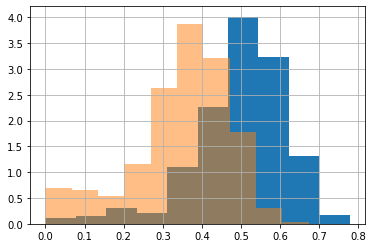

In [424]:
pd.Series(true_sims).hist(density=True)
pd.Series(bad_sims).hist(alpha=0.5, density=True)

### Actually aligning the sentences!

In [507]:
threshold = 0.15
page_radius = 1

step_penalty = 0.9

In [508]:
matched_pairs = []

In [514]:
prev_j = 0
for i in trange(len(lhs_sents)):
    best_score, best_j = 0, None
    # candidate sentences are one page above or below
    jj = [j for j, (t, p) in enumerate(rhs_sents) if abs(p-lhs_sents[i][1]) <= page_radius]

    for j in jj:
        if j < 0 or j >= len(rhs_sents):
            continue
        score = get_sent_sim(rhs_sents[j][0], lhs_sents[i][0])
        # score *=  step_penalty ** abs(j-(prev_j+1))
        if score > best_score:
            best_score, best_j = score, j
    if best_score > threshold:
        matched_pairs.append([i, best_j])
        prev_j = best_j
    print([i, best_j], best_score)

  0%|          | 0/5194 [00:00<?, ?it/s]

[0, 1] 0.6564176986740591
[1, 2] 0.9403905277158924
[2, 3] 0.5569294212108491
[3, 4] 0.5343674833364678
[4, 4] 0.5428835233189814
[5, 5] 0.4889247426589003
[6, 6] 0.6804882949025666
[7, 7] 0.589272059325291
[8, 8] 0.7338103240661519
[9, 9] 0.6089476131975857
[10, 10] 0.9048018950191881
[11, 20] 0.5486359522553447
[12, 12] 0.7242790824013353
[13, 4] 0.5428835233189814
[14, 16] 0.7080755714519212
[15, 17] 0.7799018553309633
[16, 18] 0.5844746161434022
[17, 33] 0.5597370389691629
[18, 17] 0.574376702777388
[19, 25] 0.522406462162521
[20, 29] 0.5652578110111245
[21, 29] 0.6149597579083687
[22, 49] 0.5604295260803176
[23, 20] 0.6307701625662954
[24, 26] 0.626829830980906
[25, 27] 0.6816976286209976
[26, 28] 0.6658216817543537
[27, 49] 0.6336557750556537
[28, 30] 0.635539079947149
[29, 29] 0.5022596891843436
[30, 20] 0.5899761809923931
[31, 34] 0.5626980550260761
[32, 17] 0.5455149176535679
[33, 50] 0.5639179471736506
[34, 25] 0.5597662380171505
[35, 27] 0.5879736488086921
[36, 17] 0.5389545

[329, 297] 0.5844715969305849
[330, 312] 0.25103626307442306
[331, 335] 0.1222336002032885
[332, 308] 0.7952172462398076
[333, 326] 0.42187208731033116
[334, 338] 0.5750421536674588
[335, 311] 0.47669065128361443
[336, 316] 0.5155712288246632
[337, 311] 0.5094053045064009
[338, 312] 0.6421192913276673
[339, 313] 0.6078526069468122
[340, 314] 0.5122881226984192
[341, 333] 0.5611635345465036
[342, 316] 0.4906424689528916
[343, 317] 0.4330751255952941
[344, 318] 0.6698558629961215
[345, 319] 0.5681446544209482
[346, 320] 0.49807477938076494
[347, 321] 0.6318220600686393
[348, 338] 0.5507161077481877
[349, 348] 0.4717601039913682
[350, 324] 0.602176337134885
[351, 325] 0.6402595753097777
[352, 327] 0.7296582085630006
[353, 328] 0.5126434948293427
[354, 329] 0.5966555906289746
[355, 330] 0.49542822389030317
[356, 331] 0.5528805019537733
[357, 324] 0.5057513344134186
[358, 350] 0.47344451324099124
[359, 338] 0.430441711447019
[360, 338] 0.5115424290464714
[361, 337] 0.48518626379072927
[362,

[618, 587] 0.5926057827593906
[619, 583] 0.49099722522166744
[620, 584] 0.5564404223303246
[621, 594] 0.5777622054344488
[622, 585] 0.4392328730679435
[623, 587] 0.6134563038396615
[624, 601] 0.5007753030359198
[625, 589] 0.5897682244134738
[626, 595] 0.6071688033150439
[627, 599] 0.5810960626473354
[628, 592] 0.5715502482244055
[629, 610] 0.598530143139316
[630, 601] 0.45434397926441844
[631, 592] 0.5678927699890467
[632, 610] 0.5457824270049931
[633, 598] 0.5601479148022812
[634, 585] 0.46758409532884126
[635, 585] 0.529247832553413
[636, 601] 0.651716938356621
[637, 602] 0.5279698143621901
[638, 603] 0.6093152509849739
[639, 605] 0.5867438481839257
[640, 586] 0.5915481699700716
[641, 606] 0.6421192913276673
[642, 607] 0.5788494296461713
[643, 630] 0.536578061281268
[644, 601] 0.5197136563893341
[645, 609] 0.6964576244797849
[646, 610] 0.8600592204031146
[647, 611] 0.5414898857492083
[648, 583] 0.41429766746051455
[649, 610] 0.5698084949630251
[650, 618] 0.508742613565695
[651, 638] 

[896, 847] 0.6407023735597184
[897, 848] 0.7091446265056405
[898, 849] 0.8461286468665263
[899, 850] 0.6644894249462313
[900, 851] 0.7903095657808165
[901, 852] 0.5519035590903046
[902, 853] 0.572067071049713
[903, 844] 0.5639508651208964
[904, 855] 0.7258618708040038
[905, 852] 0.3408066728441744
[906, 856] 0.19078570709222198
[907, 858] 0.5030109517545491
[908, 859] 0.5106840652389792
[909, 860] 0.6379604114233162
[910, 861] 0.6586362838189117
[911, 870] 0.568339142576377
[912, 863] 0.6758002217303778
[913, 856] 0.41282392827636194
[914, 868] 0.4963899008282099
[915, 875] 0.5728104402770452
[916, 852] 0.6760558487485131
[917, 852] 0.48557418928721413
[918, 866] 0.6602458016123948
[919, 844] 0.5419452768371215
[920, 844] 0.639450485522658
[921, 869] 0.4898708817856759
[922, 868] 0.6259533170905708
[923, 875] 0.5195267005130779
[924, 866] 0.46402404545895587
[925, 892] 0.5859057435736735
[926, 862] 0.5178932210990361
[927, 868] 0.503550870040834
[928, 874] 0.5448271970968259
[929, 884]

[1200, 1108] 0.6175483035931209
[1201, 1122] 0.6272375717905498
[1202, 1117] 0.6684471206525682
[1203, 1132] 0.5722718662869741
[1204, 1131] 0.9436427902001637
[1205, 1132] 0.8016599328685922
[1206, 1142] 0.6186552598378834
[1207, 1113] 0.48972515672125777
[1208, 1078] 0.6625162487656873
[1209, 1125] 0.4961526945276331
[1210, 1135] 0.49739541022450495
[1211, 1138] 0.6406707175969932
[1212, 1148] 0.5963287850530802
[1213, 1131] 0.7113786608980126
[1214, 1159] 0.6687421753531747
[1215, 1111] 0.6653005198843004
[1216, 1125] 0.623882272043621
[1217, 1167] 0.6625162487656873
[1218, 1144] 0.7173652842925925
[1219, 1114] 0.591294512013119
[1220, 1136] 0.6138217869786284
[1221, 1173] 0.6186721495088142
[1222, 1147] 0.6564066955237989
[1223, 1127] 0.6160137370210962
[1224, 1149] 0.8254818122236567
[1225, 1122] 0.7225205081302112
[1226, 1151] 0.6121881803042979
[1227, 1136] 0.6299605249474366
[1228, 1158] 0.6523152922909161
[1229, 1142] 0.5983433202140473
[1230, 1150] 0.6019627975937797
[1231, 1

[1457, 1337] 0.5863594946375843
[1458, 1365] 0.646838987801292
[1459, 1385] 0.5572404034515631
[1460, 1387] 0.6728576330615029
[1461, 1386] 0.522079429032209
[1462, 1378] 0.5540939754499992
[1463, 1367] 0.5735074797258048
[1464, 1368] 0.6159351361246592
[1465, 1369] 0.5705945111966193
[1466, 1359] 0.55471822139917
[1467, 1370] 0.6257702938123474
[1468, 1375] 0.5493182802091537
[1469, 1372] 0.6761048066701801
[1470, 1387] 0.6324974586324088
[1471, 1365] 0.6548365710476232
[1472, 1375] 0.6017902081024681
[1473, 1387] 0.620345454113722
[1474, 1360] 0.5784893728896872
[1475, 1378] 0.604126375546853
[1476, 1379] 0.554727859752412
[1477, 1382] 0.5065764946741965
[1478, 1381] 0.3968502629920499
[1479, 1382] 0.8094961431911516
[1480, 1385] 0.48979245626655366
[1481, 1390] 0.4924339991101887
[1482, 1385] 0.5024323344907631
[1483, 1385] 0.771583367414296
[1484, 1386] 0.7545287423934612
[1485, 1387] 0.7475267421863587
[1486, 1388] 0.5737556130501786
[1487, 1387] 0.5770790382524076
[1488, 1390] 0.

[1747, 1627] 0.5755289707551099
[1748, 1629] 0.7181940985533092
[1749, 1630] 0.7431376335545433
[1750, 1631] 0.5511125797130931
[1751, 1632] 0.5712767908720916
[1752, 1633] 0.7113786608980126
[1753, 1634] 0.6299605249474366
[1754, 1635] 0.2931610714996561
[1755, 1636] 0.6998116475067763
[1756, 1642] 0.27754353825572253
[1757, 1638] 0.6481367494048955
[1758, 1639] 0.6245178854348048
[1759, 1639] 0.5405706142716199
[1760, 1642] 0.49081492397719806
[1761, 1671] 0.4084067730789171
[1762, 1662] 0.5873678391371261
[1763, 1669] 0.5267286945723527
[1764, 1663] 0.6349503437652823
[1765, 1647] 0.5961588169563619
[1766, 1649] 0.5716319237395496
[1767, 1649] 0.5967009653653292
[1768, 1650] 0.5205709959806677
[1769, 1652] 0.4883526646676219
[1770, 1666] 0.593599557154948
[1771, 1654] 0.5476753506056959
[1772, 1692] 0.5117926180120964
[1773, 1658] 0.7719442629361641
[1774, 1698] 0.5578607917351414
[1775, 1662] 0.6259706180608982
[1776, 1660] 0.6631762013160654
[1777, 1660] 0.4536561362299567
[1778, 

[2046, 1890] 0.6134779591508585
[2047, 1891] 0.6563312445775287
[2048, 1892] 0.686171697108766
[2049, 1870] 0.6833723761031565
[2050, 1856] 0.5525333600948696
[2051, 1895] 0.6153458003599942
[2052, 1937] 0.6618655729962807
[2053, 1919] 0.7147087441235942
[2054, 1897] 0.6299605249474366
[2055, 1898] 0.7631428283688879
[2056, 1921] 0.7000416468349389
[2057, 1936] 0.5928155507483438
[2058, 1919] 0.7774104733667395
[2059, 1887] 0.5
[2060, 1920] 0.6407860711607111
[2061, 1874] 0.6294758463328303
[2062, 1937] 0.667007785074022
[2063, 1905] 0.764794982927755
[2064, 1907] 0.8722133569238506
[2065, 1924] 0.5449495536574094
[2066, 1909] 0.5239721389381216
[2067, 1878] 0.629233087204631
[2068, 1920] 0.6900714839551475
[2069, 1897] 0.6299605249474366
[2070, 1912] 0.6675836783681784
[2071, 1936] 0.5928155507483438
[2072, 1920] 0.6982192074624816
[2073, 1907] 0.34751456860248464
[2074, 1946] 0.6536428098109275
[2075, 1937] 0.6618655729962807
[2076, 1905] 0.49513377941249603
[2077, 1920] 0.5588947047

[2357, 2143] 0.44303581726872926
[2358, 2173] 0.6904405758011415
[2359, 2174] 0.6639347625669125
[2360, 2149] 0.5672440321625581
[2361, 2142] 0.5089462233332864
[2362, 2177] 0.6060298708597299
[2363, 2178] 0.5962078175689584
[2364, 2179] 0.7008004835965813
[2365, 2180] 0.5899790693112382
[2366, 2201] 0.5117563876156825
[2367, 2159] 0.6889960242213395
[2368, 2182] 0.5584663762093626
[2369, 2188] 0.5652235985953762
[2370, 2185] 0.6844837400281686
[2371, 2186] 0.6375759436285986
[2372, 2187] 0.5997516724965987
[2373, 2173] 0.571924173213361
[2374, 2188] 0.6864991056747834
[2375, 2186] 0.41478622648329966
[2376, 2212] 0.7546013420997107
[2377, 2191] 0.7591472429689157
[2378, 2195] 0.7299198566479815
[2379, 2193] 1.0
[2380, 2212] 0.5631239402218031
[2381, 2191] 0.6927204594990941
[2382, 2196] 0.6421192913276673
[2383, 2226] 0.6064629223429108
[2384, 2229] 0.5071003391746829
[2385, 2198] 0.6928470199514948
[2386, 2188] 0.5576982160868688
[2387, 2200] 0.7168096977640673
[2388, 2201] 0.6659508

[2686, 2484] 0.6259221464802974
[2687, 2485] 0.7013213668509749
[2688, 2462] 0.5288698092392484
[2689, 2462] 0.6451757498612953
[2690, 2461] 0.5826231622589433
[2691, 2494] 0.505144510312093
[2692, 2444] 0.5392728022466972
[2693, 2497] 0.47713438270908987
[2694, 2495] 0.6230090321815024
[2695, 2473] 0.6536494811252832
[2696, 2512] 0.524384093383002
[2697, 2531] 0.4668461524404905
[2698, 2473] 0.6680179848017548
[2699, 2473] 0.6086965101720249
[2700, 2497] 0.6728504499995629
[2701, 2473] 0.6137931578001262
[2702, 2499] 0.6484111285199586
[2703, 2495] 0.618272865532287
[2704, 2480] 0.5573044846876086
[2705, 2470] 0.5844847549036617
[2706, 2507] 0.56447492544537
[2707, 2469] 0.6453088084039053
[2708, 2501] 0.44821268109901585
[2709, 2505] 0.6424912563724033
[2710, 2482] 0.4907681012923979
[2711, 2507] 0.6677214540559986
[2712, 2497] 0.5606128224435661
[2713, 2469] 0.5100215793154408
[2714, 2527] 0.5268020878730334
[2715, 2511] 0.6966041877342536
[2716, 2507] 0.5349995263888153
[2717, 2528

[2975, 2781] 0.5260348638298173
[2976, 2762] 0.5617727350895523
[2977, 2781] 0.5978251488989933
[2978, 2770] 0.7903464607372349
[2979, 2778] 0.5558119187191115
[2980, 2772] 0.6259083211580615
[2981, 2773] 0.6706098538104107
[2982, 2776] 0.5485179763681471
[2983, 2775] 0.6444032532226647
[2984, 2776] 0.5543312158050712
[2985, 2772] 0.5018641416000357
[2986, 2785] 0.5928083813125737
[2987, 2779] 0.5751260793999526
[2988, 2780] 0.6379832959487125
[2989, 2781] 0.7587307300828978
[2990, 2781] 0.6269628978127632
[2991, 2783] 0.6901219188502401
[2992, 2784] 0.5738310409793864
[2993, 2785] 0.6028867378639591
[2994, 2786] 0.2823108086643086
[2995, 2787] 0.6806840940655993
[2996, 2788] 0.653447558322275
[2997, 2790] 0.5689386902207164
[2998, 2797] 0.518444606229264
[2999, 2812] 0.5807270111388565
[3000, 2813] 0.5223968241128666
[3001, 2794] 0.7597877273300271
[3002, 2795] 0.7902817275737845
[3003, 2796] 0.6277139114896212
[3004, 2797] 0.6262197690055276
[3005, 2798] 0.7113786608980126
[3006, 281

[3250, 3026] 0.5771845382597831
[3251, 3027] 0.5487998038799997
[3252, 3030] 0.5100542724749716
[3253, 3031] 0.7318083168960302
[3254, 3032] 0.5829150081670762
[3255, 3033] 0.6586614895060251
[3256, 3034] 0.690397302472794
[3257, 3035] 0.5666807189178971
[3258, 3036] 0.7151152179602512
[3259, 3027] 0.6771095047089987
[3260, 3038] 0.5807899510209943
[3261, 3039] 0.6190045005345095
[3262, 3040] 0.6196694348357482
[3263, 3024] 0.5376250385141711
[3264, 3042] 0.7627682228616331
[3265, 3043] 0.7172610896705042
[3266, 3044] 0.7576754759205234
[3267, 3045] 0.6182154874691237
[3268, 3046] 0.15874010519681997
[3269, 3047] 0.5604989135059136
[3270, 3043] 0.5656023996010133
[3271, 3048] 0.653146714680644
[3272, 3042] 0.6079332803199795
[3273, 3050] 0.6421192913276673
[3274, 3069] 0.5461867331942971
[3275, 3034] 0.574675698839288
[3276, 3050] 0.590304619974247
[3277, 3054] 0.6272822308769547
[3278, 3053] 0.6418666568014579
[3279, 3056] 0.5823868332433454
[3280, 3027] 0.5898086805402145
[3281, 3057

[3510, 3261] 0.4989191687516537
[3511, 3265] 0.6605189900561075
[3512, 3266] 0.724472490525851
[3513, 3267] 0.7439429846511775
[3514, 3268] 0.6597937232616613
[3515, 3269] 0.744245053280443
[3516, 3271] 0.2893482522326843
[3517, 3271] 0.6625373885984804
[3518, 3272] 0.7879183257323409
[3519, 3273] 0.7816048034278001
[3520, 3272] 0.752785374797281
[3521, 3275] 0.5072856807913079
[3522, 3271] 0.4666114563122383
[3523, 3253] 0.5652019071690279
[3524, 3276] 0.5363637784355547
[3525, 3276] 0.7617105413254258
[3526, 3275] 0.4723782267843568
[3527, 3248] 0.5621479290912251
[3528, 3279] 0.661320445043017
[3529, 3295] 0.5781911352786361
[3530, 3271] 0.4707695471136181
[3531, 3259] 0.5729096378913404
[3532, 3282] 0.5694378981638138
[3533, 3298] 0.5241356851510904
[3534, 3284] 0.510827229718378
[3535, 3259] 0.5580688772580104
[3536, 3266] 0.47621660317813924
[3537, 3261] 0.4893134491735664
[3538, 3287] 0.6889917208772347
[3539, 3266] 0.4638765349932711
[3540, 3289] 0.686021534610631
[3541, 3290] 

[3932, 3671] 0.6766308101993632
[3933, 3671] 0.6647469760178462
[3934, 3663] 0.528872641182362
[3935, 3669] 0.6522971169783746
[3936, 3613] 0.6322851235933076
[3937, 3663] 0.5488009760725169
[3938, 3670] 0.519950071107782
[3939, 3641] 0.4807498567691361
[3940, 3693] 0.5600542930993436
[3941, 3671] 0.8685978731800508
[3942, 3672] 0.5433889234754011
[3943, 3675] 0.43690661027725664
[3944, 3675] 0.5250676346363644
[3945, 3675] 0.5871902807229789
[3946, 3676] 0.4570672127027183
[3947, 3677] 0.6758002217303778
[3948, 3677] 0.4644571477303146
[3949, 3677] 0.6758002217303778
[3950, 3680] 0.7479663404864463
[3951, 3681] 0.646505266912522
[3952, 3682] 0.6133154247203909
[3953, 3683] 0.6213282485262557
[3954, 3649] 0.4286186644837004
[3955, 3675] 0.4381381841944505
[3956, 3686] 0.5956877114409271
[3957, 3648] 0.5618252732725647
[3958, 3655] 0.5862439562877573
[3959, 3693] 0.5073754561762109
[3960, 3694] 0.5104895124870542
[3961, 3688] 0.4924052076521616
[3962, 3678] 0.4287169226437747
[3963, 366

[4209, 3926] 0.5339492380459017
[4210, 3927] 0.5645627555525176
[4211, 3936] 0.4386434791788885
[4212, 3929] 0.5533893311328221
[4213, 3934] 0.5232113481849547
[4214, 3931] 0.5100713125976298
[4215, 3932] 0.6294696374523296
[4216, 3931] 0.4492778606415596
[4217, 3941] 0.6344841162908468
[4218, 3936] 0.6889880176838619
[4219, 3938] 0.7883735163105243
[4220, 3938] 0.814325284978472
[4221, 3962] 0.7631428283688879
[4222, 3940] 0.5855814584958552
[4223, 3941] 0.6843384433312477
[4224, 3953] 0.5679579047387653
[4225, 3953] 0.5086498343869906
[4226, 3944] 0.5729830971106367
[4227, 3931] 0.536100303300639
[4228, 3922] 0.4837308710144438
[4229, 3952] 0.45318887451039097
[4230, 3953] 0.5347323567157123
[4231, 3948] 0.6624012183082382
[4232, 3949] 0.5549744942348454
[4233, 3957] 0.6086596243921031
[4234, 3931] 0.4792814627579638
[4235, 3953] 0.6753387656475183
[4236, 3954] 0.6576846673298006
[4237, 3956] 0.5196470354802076
[4238, 3957] 0.6751599943589294
[4239, 3958] 0.6266414356113333
[4240, 39

[4475, 4169] 0.6255026413664292
[4476, 4170] 0.40399437125875864
[4477, 4189] 0.5854936580903077
[4478, 4172] 0.6833926768372145
[4479, 4173] 0.963958998336572
[4480, 4174] 0.8009705794812281
[4481, 4175] 0.690176215047398
[4482, 4161] 0.8970525154308222
[4483, 4177] 0.727498872992337
[4484, 4212] 0.6157259955996519
[4485, 4179] 0.728748572625502
[4486, 4176] 0.7448628524756679
[4487, 4181] 0.7005098326638468
[4488, 4184] 0.7867112540804417
[4489, 4184] 0.7960710819519576
[4490, 4185] 0.812275346078561
[4491, 4159] 1.0
[4492, 4186] 0.82296412118929
[4493, 4176] 0.7448628524756679
[4494, 4188] 0.8164398935536568
[4495, 4189] 0.8628439447346439
[4496, 4190] 0.7868851477942452
[4497, 4179] 0.5086161656014858
[4498, 4176] 0.7448628524756679
[4499, 4193] 0.7501648751489153
[4500, 4189] 0.6360940897637415
[4501, 4193] 0.5210700079906696
[4502, 4177] 0.6384918267755381
[4503, 4193] 0.5918240931723524
[4504, 4177] 0.607976502822242
[4505, 4190] 0.5903954101578167
[4506, 4179] 0.579095552613175

[4736, 4410] 0.5193540181871623
[4737, 4415] 0.49389114221770164
[4738, 4403] 0.46139388561064426
[4739, 4448] 0.5681685424054408
[4740, 4440] 0.552931645095066
[4741, 4418] 0.587458167631919
[4742, 4419] 0.6007935101509699
[4743, 4420] 0.5970972848097793
[4744, 4440] 0.6070586543822366
[4745, 4422] 0.7150815559107125
[4746, 4442] 0.5072198787753632
[4747, 4423] 0.5262283615474129
[4748, 4445] 0.5583708539229131
[4749, 4426] 0.5753695826647881
[4750, 4425] 0.8028813201038023
[4751, 4446] 0.5511313625770492
[4752, 4426] 0.6644775369328298
[4753, 4446] 0.5341440151436284
[4754, 4447] 0.5415534358765568
[4755, 4429] 0.5808792889917047
[4756, 4430] 0.677851691888929
[4757, 4431] 0.6006179595287792
[4758, 4448] 0.49392118155530407
[4759, 4448] 0.5498212286254364
[4760, 4463] 0.5632731212114267
[4761, 4463] 0.6150377197282775
[4762, 4435] 0.4933656318802364
[4763, 4460] 0.5209553989452945
[4764, 4446] 0.5738481400421473
[4765, 4419] 0.4333147440741672
[4766, 4449] 0.5219728384676986
[4767, 4

[5000, 4639] 0.5718685773278724
[5001, 4632] 0.5860986752522604
[5002, 4628] 0.5351071813976158
[5003, 4661] 0.6039013869869457
[5004, 4647] 0.6161436802881541
[5005, 4648] 0.5761833134382569
[5006, 4649] 0.5839812048285777
[5007, 4650] 0.5897128674982901
[5008, 4639] 0.5614339218403754
[5009, 4652] 0.6146457648050306
[5010, 4639] 0.5824246497495178
[5011, 4654] 0.5651724760576059
[5012, 4646] 0.5715220935365293
[5013, 4646] 0.6228141327950878
[5014, 4647] 0.4007813935449484
[5015, 4655] 0.5744954694329857
[5016, 4646] 0.4639490227468184
[5017, 4639] 0.5230470342627974
[5018, 4646] 0.46632893064569386
[5019, 4672] 0.5853520384369908
[5020, 4660] 0.5681563012329276
[5021, 4639] 0.5500223715283509
[5022, 4661] 0.6286274405602684
[5023, 4663] 0.4662182232191967
[5024, 4647] 0.4767815192011014
[5025, 4639] 0.5327892313156274
[5026, 4660] 0.594631563872237
[5027, 4647] 0.5531647910635863
[5028, 4672] 0.553505565661128
[5029, 4681] 0.5308716520461887
[5030, 4675] 0.2915301284160095
[5031, 46

In [513]:
lhs_sents[280]

('Уртнэ васня пуромить вейс, мейле, щёлкаезь ды эльнезь, срадыть «виренть» келес, ушодыть налксеме чикордайсэ, вейкест-вейкест велькска кирнявтнеме.',
 13)

In [512]:
rhs_sents[240]

('Играют весной и летом преимущественно мальчики.', 12)

# Alignment-2

In [81]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from razdel import sentenize, tokenize
import json 
import re
import random
from tqdm.auto import tqdm, trange

In [83]:
import torch
from transformers import AutoTokenizer, AutoModel
mname = 'labse_erzya_v0'
tokenizer = AutoTokenizer.from_pretrained(mname)
model = AutoModel.from_pretrained(mname)

Some weights of the model checkpoint at labse_erzya_v0 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [160]:
model.cuda();

In [164]:
def embed(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    with torch.inference_mode():
        model_output = model(**encoded_input.to(model.device))
        embeddings = model_output.pooler_output
        embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [85]:
def center_norm(v):
    v = v - v.mean(0)
    return v /  (v**2).sum(1, keepdims=True) ** 0.5


def center_dot(x, y):
    m = (x.sum(0) + y.sum(0)) / (x.shape[0] + y.shape[0])
    x = x - m
    y = y - m
    x =  x /  (x**2).sum(1, keepdims=True) ** 0.5
    y =  y /  (y**2).sum(1, keepdims=True) ** 0.5
    return np.dot(x, y.T)

In [86]:
def get_top_mean_by_row(x, k=5):
    m, n = x.shape
    k = min(k, n)
    topk_indices = np.argpartition(x, -k, axis=1)[:, -k:]
    rows, _ = np.indices((m, k))
    return x[rows, topk_indices].mean(1)

In [87]:
def align3(sims):
    
    #sims = np.dot(center_norm(orig_vecs), center_norm(sum_vecs).T) ** 3
    #sims = center_dot(orig_embeds, sum_embeds) #** 3

    rewards = np.zeros_like(sims)
    choices = np.zeros_like(sims).astype(int)  # 1: choose this pair, 2: decrease i, 3: decrease j

    # алгоритм, разрешающий пропускать сколько угодно пар, лишь бы была монотонность
    for i in trange(sims.shape[0]):
        for j in range(0, sims.shape[1]):
            # вариант первый: выровнять i-тое предложение с j-тым
            score_add = sims[i, j]
            if i > 0 and j > 0:  # вот как тогда выровняются предыдущие 
                score_add += rewards[i-1, j-1]
                choices[i, j] = 1
            best = score_add
            if i > 0 and rewards[i-1, j] > best:
                best = rewards[i-1, j]
                choices[i, j] = 2
            if j > 0 and rewards[i, j-1] > best:
                best = rewards[i, j-1]
                choices[i, j] = 3
            rewards[i, j] = best
    alignment = []
    i = sims.shape[0] - 1
    j = sims.shape[1] - 1
    while i > 0 and j > 0:
        if choices[i, j] == 1:
            alignment.append([i, j])
            i -= 1
            j -= 1
        elif choices[i, j] == 2:
            i -= 1
        else:
            j -= 1
    return alignment[::-1]

### Align Sheyanova (this is perfect!)

In [87]:
with open('other_sources/sheyanova___sections_unaligned.json', 'r') as f:
    sheyanova_sections = json.load(f)

In [89]:
len(sheyanova_sections['myv'])

24

Все выравниваются хорошо (скоры 50-60%), кроме 7 секции с разными длинами, там на вид переводы тоже норм, но качество только 40%. 

На 8 секции выравнивание вроде норм, но скор только 32%-40. 

In [174]:
sheyanova_aligned = []

In [175]:
for sec_id in trange(len(sheyanova_sections['myv'])):
    sents_er = sheyanova_sections['myv'][sec_id]
    sents_ru = sheyanova_sections['rus'][sec_id]
    sents_er = [s for s in sents_er if s.strip()]
    sents_ru = [s for s in sents_ru if s.strip()]
    print(sec_id, len(sents_ru), len(sents_er))
    emb_ru = np.stack([embed(s) for s in tqdm(sents_ru)])
    emb_er = np.stack([embed(s) for s in tqdm(sents_er)])
    
    pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
    sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

    alpha = 0.2
    sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha

    alignment = align3(sims_rel)

    print(sum(sims[i, j] for i, j in alignment) / min(sims.shape))

    # plt.imshow(sims_rel);
    
    for i, j in alignment:
        #print(sents_ru[i].replace('\n', ' '))
        #print(sents_er[j].replace('\n', ' '))
        sheyanova_aligned.append({'ru': sents_ru[i], 'myv': sents_er[j]})

  0%|          | 0/24 [00:00<?, ?it/s]

0 51 51


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

0.6068137947372171
1 43 43


  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

0.5430295452691487
2 31 31


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.5484245435788498
3 31 31


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.512200001831648
4 56 56


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

0.5337381809115572
5 95 95


  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

0.506112061891255
6 35 36


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

0.509102520987062
7 107 621


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/621 [00:00<?, ?it/s]

0.4158998666950417
8 20 23


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

0.32253400069587845
9 13 13


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

0.46639144790776776
10 95 98


  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

0.5373500167625179
11 84 95


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

0.5158857081694298
12 22 23


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

0.42506828107025574
13 118 122


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

0.5402624407594981
14 140 160


  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

0.5091444525908825
15 2 2


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0.2954628441068861
16 8 8


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

0.45454022199943367
17 7 7


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

0.43658774591510024
18 14 14


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

0.4691574317404178
19 6 6


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0.5106314041612733
20 40 40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

0.5401768224428325
21 27 28


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

0.547801942902949
22 7 7


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

0.43352781671882096
23 18 18


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

0.5257392420223713


In [176]:
print(len(sheyanova_aligned))

1023


In [177]:
with open('other_sources/sheyanova_sentence_aligned.json', 'w') as f:
    json.dump(sheyanova_aligned, f, ensure_ascii=False, indent=2)

### Align Brizhinskiy (page-wise)

У Брижинского ровность выравнивания тоже довольно высока, 

In [178]:
with open('other_sources/BrizhinskiyVasiliySergeevich_001___sentences_unaligned.json', 'r') as f:
    briz = json.load(f)

In [182]:
print(len(briz['myv']))
print(len(briz['rus']))

5194
4851


In [180]:
print(briz['myv'][0])

['Чачсь 1934 иень январень 19-це чистэ МР-нь Кочкуровань райононь Од Тягловка велесэ, театровед, режиссёр, педагог.', 0]


In [184]:
sents_er = [s for s, _ in briz['myv'] if s.strip()]
sents_ru = [s for s, _ in briz['rus'] if s.strip()]
print(len(sents_ru), len(sents_er))

4851 5194


In [185]:
emb_ru = np.stack([embed(s) for s in tqdm(sents_ru)])
emb_er = np.stack([embed(s) for s in tqdm(sents_er)])

  0%|          | 0/4851 [00:00<?, ?it/s]

  0%|          | 0/5194 [00:00<?, ?it/s]

In [188]:
pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

alpha = 0.2
sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha

alignment = align3(sims_rel)

print(sum(sims[i, j] for i, j in alignment) / min(sims.shape))

  0%|          | 0/4851 [00:00<?, ?it/s]

0.4330963097720021


In [189]:
print(len(alignment))

4203


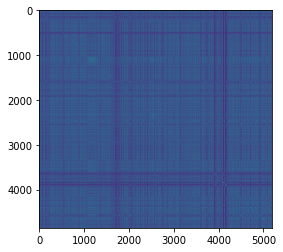

In [190]:
plt.imshow(sims_rel)

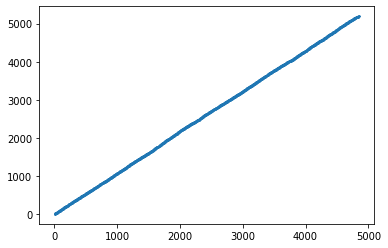

In [192]:
plt.scatter(*list(zip(*alignment)), s=1);

In [200]:
for _ in range(10):
    i, j = random.choice(alignment)
    print(sents_ru[i])
    print(sents_er[j])
    print('-')

Игра первая Участвуют 2 — 4 играющих.
Ламочинь коряс весе стявтыть кознатнень вейкетьстэ.
-
При этом бабки ставятся парами, конов (отметок) для броска лячки и с той, и с другой стороны устанавливается по одному в 4 — 5 м от квадрата.
Ляч* катне ёртневить кознатнень лангс кавто ёндо, кавто консто, конат теезь кознатнень эйстэ вейкень кувалмонь тарка.
-
Большак подбрасывается вверх.
Прявткесь ёртови верев.
-
Все камешки в правой руке.
Весе кевнетне коморсот.
-
Содержание и условия игры Каждая команда возглавляется пред* водителем.
Налксемань кой-кирдатне Эрьва командась кочки эстензэ прявт.
-
Цибы ставятся на ту же линию, по кото рой побегут «ножки».
Ци батне путневить секе кикстнэнь лангс, конаванть сави чиемс «пильгинетненень».
-
Играют мальчики и девочки 10 — 14 лет.
Налксицятне 10 — 14 иесэ цёрынеть ды тейтернеть.
-
Все поют песню «Давай, брат», ступая на каждое слово по шагу.
Теке марто весе морыть «Адя, брат, мирятано» моронть ды эрьва валонь ёвтазь теить ве эс келькс.
-
Справа и с

In [201]:
briz_alignment = []
for i, j in alignment:
    briz_alignment.append({'ru': sents_ru[i], 'myv': sents_er[j]})

In [204]:
len(briz_alignment)

4203

In [202]:
with open('other_sources/brizhinskiy_sentence_aligned.json', 'w') as f:
    json.dump(briz_alignment, f, ensure_ascii=False, indent=2)

# Evsenyev

The translation is very good, but the quality of OCR is poor. 

In [189]:
with open('books_parallel/evsenyev.txt', 'r') as f:
    ev_lines = [line.strip() for line in f.readlines()]

In [190]:
stories = []

story = []
for i, line in enumerate(ev_lines):
    if line.isdigit():
        continue
    if line.isupper():
        # print(line)
        if story:
            stories.append(story)
            story = []
        if line[0].isdigit():
            story = [line + '. ']
    else:
        if line[0].isdigit():
            continue # примечания
        story.append(line)
    if line == 'СОДАМО ЁВКСТ':
        break

# special parsing for riddles
riddle_lines = []
for line in ev_lines[i+1:]:
    if line.isdigit():
        continue
    riddle_lines.append(line)
    # todo: parse riddles

In [191]:
len(stories)

126

In [192]:
# check that all stories go in pairs
for i, s in enumerate(stories):
    assert s[0].split()[0][:-1] == str(i//2+1)
    print(s[0])

1. СЕИНЕ. 
1. КОЗА. 
2. ПУСТАЧЕЙ. 
2. ПУСТАЧЕЙ. 
3. ЧЕЕРНЕ. 
3. МЫШКА. 
4. СЮКОР ПАТЯ. 
4. СЕСТРА-ЛЕПЕШКА. 
5. РИВЕЗЬ ДЫ ОВТО. 
5. ЛИСИЦА И МЕДВЕДЬ. 
6. АТЯ, ОВТО ДЫ РИВЕЗЬ. 
6. СТАРИК, МЕДВЕДЬ И ЛИСИЦА. 
7. ВАРАКА МАРТО РИВЕСЬКЕ. 
7. ВОРОНА И ЛИСИДА. 
8. АТЯКШКЕ ДЫ КАТКИНЕ. 
8. КОШКА И ПЕТУШОК. 
9. РИВЕЗЬ МАРТО НУМОЛО. 
9. ЛИСИЦА И ЗАЯЦ. 
10. БУКИНЕ МАРТО ПСАКИНЕ. 
10. БЫК И КОШКА. 
11. КАТКА ДЫ РИВЕЗЬ. 
11. КОШКА И ЛИСИЦА. 
12. АТИНЕ ДЫ РИВЕСЬКЕ. 
12. СТАРИК И ЛИСИЦА. 
13. ВЕДЯВА. 
13. ВЕДЯВА. 
14. АЛТАЗЬ ЦЁРА. 
14. ОБЕЩАННЫЙ СЫН. 
15. ДЯЧКА НАЙ-НАЙ ДЫ СОНЗЭ ТЕИТЕРЕЗЭ МАЗЫ МАРЯ. 
15. ДЯЧКА НАИ-НАЙ И ЕГО ДОЧЬ МАРИЯ ПРЕКРАСНАЯ. 
16. ОЗЯЗ ДЫ ЧЕЕРЬ. 
16. ВОРОБЕИ И МЫШЬ. 
17. ИВАН. 
17. ИВАН. 
18. СИЯ ПЕИНЕ-ТЕИТЕРНЕ. 
18. ДЕВОЧКА С СЕРЕБРЯНЫМ ЗУБОМ. 
19. КЕЖЕЙ ОД АВА. 
19. ЗЛАЯ МАЧЕХА. 
20. КЕВГАНЯ. 
20. КЕВГАНЯ. 
21. ОД АВА. 
21. МАЧЕХА. 
22. ЦЁРЫНЕСЬ ТЕЕВСЬ БАРАНКС. 
22. КАК МАЛЬЧИК ПРЕВРАТИЛСЯ В БАРАШКД. 
23. ЯГА-БАБА. 
23. БАБА-ЯГА. 
24. ЯГА-БАБАНЬ ТЕЙТЕРЬ. 
24. ДОЧЬ БАБЫ-ЯГИ. 
25. СЫ

In [193]:
import razdel

In [194]:
for story in stories[1::2]:
    for s in razdel.sentenize('\n'.join(story)):
        if len(s.text) > 100:
            if len([c for i, c in enumerate(s.text) 
                    if c.isalpha() and c.isupper() and i > 2 and s.text[i-1] == ' ' and s.text[i-2] != '—']) > 1:
                print(s.text.replace('\n', ' '))

Только старик стал пить, Дячка Най-най схватил его за бороду и говорит: — Обещай мне из твоего дэма то, о чем не знаешь!
— Не сделать тебе работу Дячки Най-ная,—гово- рит Баба-Яга.— Иди далыне, найдешь мою старшую сестру, она тебя научит, что делать.
— Не сделать тебе работу Дячки Най-ная,— гово- рит Баба-Яга.— Иди дальше, найдешь еще одну Бабу- Ягу.
Ты не показы- вайся к,огда девушка скажет «Если юноша взял мое платье, пусть будет мне мужем», тогда выходи и отдай Марии Прекрасной ее платье.
Дячка Най-най говорит Марии Прекрасной: — Накорми юношу, напой, а я подумаю, какую бы работу ему дать.
Дала она юноше белый платочек и говорит: — Выйди на двор, махни платочком на четыре сто- роны и крикни: «Родичи Дячки Най-ная, соберитесь сюда, подсчитайте, сколько зерен проса в его амбаре, запишите на бумаге, а бумагу передайте мне».
Собрались все родичи Дячки Най-ная, подсччтали просо по зернышку, записали на бумаге, бумагу отдали юноше.
На, возьми платочек, выйди вэ двор, махни на четыре сторо

In [195]:
t = 'Вечером пришел к ним - под окно волк и пэет: — Живут-поживают ста-\nрик Кудельнзя борода, ста- руха Оловянный глаз.'

In [196]:
def dashrepl(matchobj):
    return matchobj.group(1) + matchobj.group(3)

def fix_breaks(text):
    return re.sub('([а-яА-ЯёЁ])(\-\s+)([а-яА-ЯёЁ])', dashrepl, text)

fix_breaks(t)

'Вечером пришел к ним - под окно волк и пэет: — Живут-поживают старик Кудельнзя борода, старуха Оловянный глаз.'

In [197]:
def make_sents(story):
    t = '\n'.join(story)
    t = fix_breaks(t)
    return [s.text.strip().replace('\n', ' ') for s in razdel.sentenize(t) if s.text.strip()]

In [198]:
i = 10

In [199]:
sents_er = make_sents(stories[2*i])
sents_ru = make_sents(stories[2*i+1])

emb_ru = np.stack([embed(s) for s in tqdm(sents_ru)])
emb_er = np.stack([embed(s) for s in tqdm(sents_er)])

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

0.40176266574753516


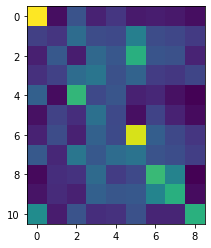

In [200]:
pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

alpha = 0.2
sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha

alignment = align3(sims_rel)

print(sum(sims[i, j] for i, j in alignment) / min(sims.shape))

plt.imshow(sims_rel);

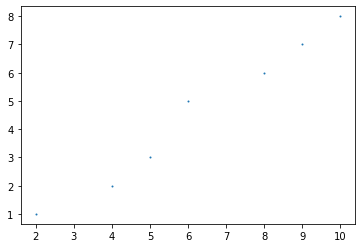

In [201]:
plt.scatter(*list(zip(*alignment)), s=1);

In [202]:
for _ in range(10):
    i, j = random.choice(alignment)
    print(sents_ru[i])
    print(sents_er[j])
    print(sims[i, j])
    print('-')

Я знаю одну такую уловку.
Монь ули вейке истямо ёжовчим.
0.5727627376715343
-
Во время разговора к ним подошли охотники с собаками.
Сынст кортамо шкастонть састь охотникть киска марто.
0.8477312933723882
-
Во время разговора к ним подошли охотники с собаками.
Сынст кортамо шкастонть састь охотникть киска марто.
0.8477312933723882
-
Лисица стала пускать в ход все свои увертки, но раз ошиблась.
Ривезась кармась эрьва кода велявтневеме ды ваа рясто эзь велявтово.
0.5550561950487249
-
Во время разговора к ним подошли охотники с собаками.
Сынст кортамо шкастонть састь охотникть киска марто.
0.8477312933723882
-
Лисица стала пускать в ход все свои увертки, но раз ошиблась.
Ривезась кармась эрьва кода велявтневеме ды ваа рясто эзь велявтово.
0.5550561950487249
-
Лисица стала пускать в ход все свои увертки, но раз ошиблась.
Ривезась кармась эрьва кода велявтневеме ды ваа рясто эзь велявтово.
0.5550561950487249
-
Собаки ее и поймали.
Кискатне сонзэ кундызь,
0.5311178642770519
-
Я знаю одну таку

In [203]:
mathed_stories = []

for i in trange(len(stories)//2):
    sents_er = make_sents(stories[2*i])
    sents_ru = make_sents(stories[2*i+1])

    emb_ru = np.stack([embed(s) for s in sents_ru])
    emb_er = np.stack([embed(s) for s in sents_er])
    
    pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
    sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

    alpha = 0.2
    sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha

    alignment = align3(sims_rel)

    print(sum(sims[i, j] for i, j in alignment) / min(sims.shape))
    
    for i, j in alignment:
        if sims[i, j] >= 0.4: 
            mathed_stories.append([sents_er[j], sents_ru[i]])

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

0.4630563064076396


  0%|          | 0/38 [00:00<?, ?it/s]

0.5235887376245557


  0%|          | 0/63 [00:00<?, ?it/s]

0.6028594797383795


  0%|          | 0/99 [00:00<?, ?it/s]

0.530531671553623


  0%|          | 0/58 [00:00<?, ?it/s]

0.5344503047763646


  0%|          | 0/42 [00:00<?, ?it/s]

0.570042803519376


  0%|          | 0/46 [00:00<?, ?it/s]

0.5379069082156085


  0%|          | 0/42 [00:00<?, ?it/s]

0.5507197751828016


  0%|          | 0/59 [00:00<?, ?it/s]

0.48005143714163756


  0%|          | 0/84 [00:00<?, ?it/s]

0.5334892950188317


  0%|          | 0/11 [00:00<?, ?it/s]

0.40176266574753516


  0%|          | 0/34 [00:00<?, ?it/s]

0.5415516734185698


  0%|          | 0/319 [00:00<?, ?it/s]

0.5209817474490984


  0%|          | 0/95 [00:00<?, ?it/s]

0.5933586445016863


  0%|          | 0/216 [00:00<?, ?it/s]

0.5102973669700718


  0%|          | 0/79 [00:00<?, ?it/s]

0.5213827949468067


  0%|          | 0/453 [00:00<?, ?it/s]

0.5085413179041565


  0%|          | 0/130 [00:00<?, ?it/s]

0.44624711798317407


  0%|          | 0/72 [00:00<?, ?it/s]

0.4956865652820503


  0%|          | 0/88 [00:00<?, ?it/s]

0.5622149757934566


  0%|          | 0/107 [00:00<?, ?it/s]

0.5263424224778129


  0%|          | 0/45 [00:00<?, ?it/s]

0.47746076038809604


  0%|          | 0/141 [00:00<?, ?it/s]

0.4985031296330878


  0%|          | 0/88 [00:00<?, ?it/s]

0.5093247826120142


  0%|          | 0/122 [00:00<?, ?it/s]

0.5269303978081425


  0%|          | 0/63 [00:00<?, ?it/s]

0.4878794617343131


  0%|          | 0/65 [00:00<?, ?it/s]

0.48819166168201794


  0%|          | 0/57 [00:00<?, ?it/s]

0.584706123939268


  0%|          | 0/49 [00:00<?, ?it/s]

0.5313516296053223


  0%|          | 0/117 [00:00<?, ?it/s]

0.3375858339648804


  0%|          | 0/36 [00:00<?, ?it/s]

0.4656847117360109


  0%|          | 0/33 [00:00<?, ?it/s]

0.5805533770666247


  0%|          | 0/20 [00:00<?, ?it/s]

0.5980796299633783


  0%|          | 0/138 [00:00<?, ?it/s]

0.47076253956484065


  0%|          | 0/132 [00:00<?, ?it/s]

0.4852838742532783


  0%|          | 0/95 [00:00<?, ?it/s]

0.5205392953531481


  0%|          | 0/40 [00:00<?, ?it/s]

0.5957571471589062


  0%|          | 0/73 [00:00<?, ?it/s]

0.5013182273532804


  0%|          | 0/101 [00:00<?, ?it/s]

0.5484717226213737


  0%|          | 0/82 [00:00<?, ?it/s]

0.5294987423605433


  0%|          | 0/70 [00:00<?, ?it/s]

0.5469956560488347


  0%|          | 0/84 [00:00<?, ?it/s]

0.5591159062399895


  0%|          | 0/157 [00:00<?, ?it/s]

0.49705505361599056


  0%|          | 0/139 [00:00<?, ?it/s]

0.5052060277446504


  0%|          | 0/50 [00:00<?, ?it/s]

0.5598502635689534


  0%|          | 0/7 [00:00<?, ?it/s]

0.4350551652126401


  0%|          | 0/43 [00:00<?, ?it/s]

0.5222087252574914


  0%|          | 0/81 [00:00<?, ?it/s]

0.48050082593087956


  0%|          | 0/67 [00:00<?, ?it/s]

0.3497183527306361


  0%|          | 0/97 [00:00<?, ?it/s]

0.42241579185661854


  0%|          | 0/12 [00:00<?, ?it/s]

0.42777093201933


  0%|          | 0/97 [00:00<?, ?it/s]

0.504618275392419


  0%|          | 0/60 [00:00<?, ?it/s]

0.5538594311912166


  0%|          | 0/131 [00:00<?, ?it/s]

0.5273657372772548


  0%|          | 0/95 [00:00<?, ?it/s]

0.5770287625613353


  0%|          | 0/58 [00:00<?, ?it/s]

0.5406662524304889


  0%|          | 0/17 [00:00<?, ?it/s]

0.5432308960688459


  0%|          | 0/22 [00:00<?, ?it/s]

0.5437793497639456


  0%|          | 0/10 [00:00<?, ?it/s]

0.5395853890816512


  0%|          | 0/14 [00:00<?, ?it/s]

0.6166317446582515


  0%|          | 0/6 [00:00<?, ?it/s]

0.4718267464607892


  0%|          | 0/33 [00:00<?, ?it/s]

0.5884666883457038


  0%|          | 0/17 [00:00<?, ?it/s]

0.49396160053937743


In [204]:
print(len(mathed_stories))

3676


In [205]:
matched_riddles = []

cand = []

for line in riddle_lines:
    if line.replace(' ', '').replace('*', '').replace('#', '') == '':
        continue
    line = fix_breaks(line)
    line = re.sub('\([^()]*\)', '', line).strip()
    if line.split('.')[0].isdigit():
        sents = make_sents([line.split('.', 1)[1]])
        if len(sents) == 2:
            matched_riddles.append(sents)
        elif len(sents) == 1:
            cand = sents
        else:
            cand = []
    else:
        sents = make_sents(line)
        if len(sents) == 1 and len(cand) == 1:
            matched_riddles.append(cand+sents)

In [206]:
len(matched_riddles)

100

In [207]:
with open('other_sources/evsenyev_stories_aligned.json', 'w') as f:
    json.dump(mathed_stories+matched_riddles, f, ensure_ascii=False, indent=2)